<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S10/s10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S10/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/S10


In [2]:
!pip install albumentations

# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [4]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


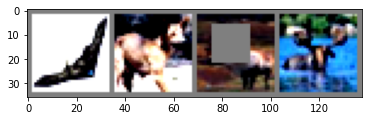

In [5]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14      

# Loss function and optimizer




Learning rate search finished. See the graph with {finder_name}.plot()


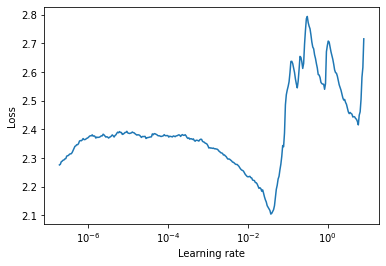

In [9]:
from LRfinder import LRFinder
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-7)
lr_finder = LRFinder(net, optimizer, criterion, device="cuda")
lr_finder.range_test(loader.trainloader, end_lr=10, num_iter=350, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state


# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [11]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

epochs = 50
last_epoch=False

optimizer = optim.SGD(net.parameters(), lr=1e-2, momentum=0.9)
scheduler = ReduceLROnPlateau(optimizer, 'min') #StepLR(optimizer, step_size=6, gamma=0.1)

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, loader.testloader, criterion,last_epoch)

Epoch= 0 Loss=1.041219711303711 Batch_id=781 Accuracy=48.03: 100%|██████████| 782/782 [00:30<00:00, 25.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0182, Accuracy: 6057/10000 (60.57%)



Epoch= 1 Loss=0.7513889074325562 Batch_id=781 Accuracy=66.55: 100%|██████████| 782/782 [00:30<00:00, 25.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0134, Accuracy: 7077/10000 (70.77%)



Epoch= 2 Loss=0.9192036986351013 Batch_id=781 Accuracy=74.03: 100%|██████████| 782/782 [00:30<00:00, 25.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0108, Accuracy: 7624/10000 (76.24%)



Epoch= 3 Loss=0.35119199752807617 Batch_id=781 Accuracy=77.61: 100%|██████████| 782/782 [00:30<00:00, 25.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0100, Accuracy: 7797/10000 (77.97%)



Epoch= 4 Loss=0.4420722723007202 Batch_id=781 Accuracy=80.09: 100%|██████████| 782/782 [00:30<00:00, 25.59it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0099, Accuracy: 7912/10000 (79.12%)



Epoch= 5 Loss=0.49678874015808105 Batch_id=781 Accuracy=82.04: 100%|██████████| 782/782 [00:30<00:00, 25.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8334/10000 (83.34%)



Epoch= 6 Loss=0.852249264717102 Batch_id=781 Accuracy=83.64: 100%|██████████| 782/782 [00:30<00:00, 25.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0074, Accuracy: 8442/10000 (84.42%)



Epoch= 7 Loss=0.6336749196052551 Batch_id=781 Accuracy=85.02: 100%|██████████| 782/782 [00:30<00:00, 25.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8501/10000 (85.01%)



Epoch= 8 Loss=0.5903332829475403 Batch_id=781 Accuracy=86.25: 100%|██████████| 782/782 [00:30<00:00, 25.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8493/10000 (84.93%)



Epoch= 9 Loss=0.10734528303146362 Batch_id=781 Accuracy=87.37: 100%|██████████| 782/782 [00:30<00:00, 25.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0083, Accuracy: 8353/10000 (83.53%)



Epoch= 10 Loss=0.12006579339504242 Batch_id=781 Accuracy=88.45: 100%|██████████| 782/782 [00:30<00:00, 25.54it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0078, Accuracy: 8384/10000 (83.84%)



Epoch= 11 Loss=0.2690057158470154 Batch_id=781 Accuracy=89.19: 100%|██████████| 782/782 [00:30<00:00, 25.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8664/10000 (86.64%)



Epoch= 12 Loss=0.6039484143257141 Batch_id=781 Accuracy=89.74: 100%|██████████| 782/782 [00:30<00:00, 25.28it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8683/10000 (86.83%)



Epoch= 13 Loss=0.15433010458946228 Batch_id=781 Accuracy=90.38: 100%|██████████| 782/782 [00:30<00:00, 25.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8758/10000 (87.58%)



Epoch= 14 Loss=0.22295646369457245 Batch_id=781 Accuracy=91.01: 100%|██████████| 782/782 [00:30<00:00, 25.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8676/10000 (86.76%)



Epoch= 15 Loss=0.44971874356269836 Batch_id=781 Accuracy=91.55: 100%|██████████| 782/782 [00:30<00:00, 25.36it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8793/10000 (87.93%)



Epoch= 16 Loss=0.5041282176971436 Batch_id=781 Accuracy=92.18: 100%|██████████| 782/782 [00:30<00:00, 25.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8794/10000 (87.94%)



Epoch= 17 Loss=0.19149141013622284 Batch_id=781 Accuracy=92.66: 100%|██████████| 782/782 [00:30<00:00, 25.64it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8785/10000 (87.85%)



Epoch= 18 Loss=0.10291698575019836 Batch_id=781 Accuracy=92.99: 100%|██████████| 782/782 [00:30<00:00, 25.52it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8825/10000 (88.25%)



Epoch= 19 Loss=0.4721798300743103 Batch_id=781 Accuracy=93.32: 100%|██████████| 782/782 [00:30<00:00, 25.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8847/10000 (88.47%)



Epoch= 20 Loss=0.5126707553863525 Batch_id=781 Accuracy=93.76: 100%|██████████| 782/782 [00:30<00:00, 25.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8829/10000 (88.29%)



Epoch= 21 Loss=0.18208441138267517 Batch_id=781 Accuracy=94.15: 100%|██████████| 782/782 [00:30<00:00, 25.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0061, Accuracy: 8912/10000 (89.12%)



Epoch= 22 Loss=0.3692034184932709 Batch_id=781 Accuracy=94.36: 100%|██████████| 782/782 [00:30<00:00, 25.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8845/10000 (88.45%)



Epoch= 23 Loss=0.25061750411987305 Batch_id=781 Accuracy=94.68: 100%|██████████| 782/782 [00:30<00:00, 25.57it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8874/10000 (88.74%)



Epoch= 24 Loss=0.18622896075248718 Batch_id=781 Accuracy=95.12: 100%|██████████| 782/782 [00:30<00:00, 25.66it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8908/10000 (89.08%)



Epoch= 25 Loss=0.09913161396980286 Batch_id=781 Accuracy=95.17: 100%|██████████| 782/782 [00:30<00:00, 25.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8742/10000 (87.42%)



Epoch= 26 Loss=0.048549771308898926 Batch_id=781 Accuracy=95.58: 100%|██████████| 782/782 [00:30<00:00, 25.46it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8892/10000 (88.92%)



Epoch= 27 Loss=0.17394886910915375 Batch_id=781 Accuracy=95.74: 100%|██████████| 782/782 [00:30<00:00, 25.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8936/10000 (89.36%)



Epoch= 28 Loss=0.4911079704761505 Batch_id=781 Accuracy=95.75: 100%|██████████| 782/782 [00:30<00:00, 25.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8930/10000 (89.30%)



Epoch= 29 Loss=0.04119616746902466 Batch_id=781 Accuracy=95.81: 100%|██████████| 782/782 [00:30<00:00, 25.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8902/10000 (89.02%)



Epoch= 30 Loss=0.0052435994148254395 Batch_id=781 Accuracy=96.15: 100%|██████████| 782/782 [00:30<00:00, 25.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 8912/10000 (89.12%)



Epoch= 31 Loss=0.2248859405517578 Batch_id=781 Accuracy=96.38: 100%|██████████| 782/782 [00:30<00:00, 25.69it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8935/10000 (89.35%)



Epoch= 32 Loss=0.34437477588653564 Batch_id=781 Accuracy=96.32: 100%|██████████| 782/782 [00:30<00:00, 25.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8905/10000 (89.05%)



Epoch= 33 Loss=0.21203555166721344 Batch_id=781 Accuracy=96.57: 100%|██████████| 782/782 [00:30<00:00, 25.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0061, Accuracy: 8992/10000 (89.92%)



Epoch= 34 Loss=0.10320770740509033 Batch_id=781 Accuracy=96.63: 100%|██████████| 782/782 [00:30<00:00, 25.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8952/10000 (89.52%)



Epoch= 35 Loss=0.1984008252620697 Batch_id=781 Accuracy=96.64: 100%|██████████| 782/782 [00:30<00:00, 25.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 9026/10000 (90.26%)



Epoch= 36 Loss=0.013880372047424316 Batch_id=781 Accuracy=96.69: 100%|██████████| 782/782 [00:30<00:00, 25.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8956/10000 (89.56%)



Epoch= 37 Loss=0.6062760353088379 Batch_id=781 Accuracy=96.97: 100%|██████████| 782/782 [00:30<00:00, 25.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8964/10000 (89.64%)



Epoch= 38 Loss=0.006241977214813232 Batch_id=781 Accuracy=96.92: 100%|██████████| 782/782 [00:31<00:00, 25.13it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8972/10000 (89.72%)



Epoch= 39 Loss=0.16687238216400146 Batch_id=781 Accuracy=96.98: 100%|██████████| 782/782 [00:30<00:00, 25.32it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8986/10000 (89.86%)



Epoch= 40 Loss=0.010710477828979492 Batch_id=781 Accuracy=97.14: 100%|██████████| 782/782 [00:30<00:00, 25.50it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8914/10000 (89.14%)



Epoch= 41 Loss=0.17952927947044373 Batch_id=781 Accuracy=97.27: 100%|██████████| 782/782 [00:30<00:00, 25.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 8969/10000 (89.69%)



Epoch= 42 Loss=0.030649840831756592 Batch_id=781 Accuracy=97.40: 100%|██████████| 782/782 [00:30<00:00, 25.35it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8958/10000 (89.58%)



Epoch= 43 Loss=0.04780137538909912 Batch_id=781 Accuracy=97.32: 100%|██████████| 782/782 [00:30<00:00, 25.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8971/10000 (89.71%)



Epoch= 44 Loss=0.0015228986740112305 Batch_id=781 Accuracy=97.53: 100%|██████████| 782/782 [00:30<00:00, 25.47it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 9006/10000 (90.06%)



Epoch= 45 Loss=0.1653079390525818 Batch_id=781 Accuracy=97.59: 100%|██████████| 782/782 [00:30<00:00, 25.40it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 9008/10000 (90.08%)



Epoch= 46 Loss=0.0047370195388793945 Batch_id=781 Accuracy=97.61: 100%|██████████| 782/782 [00:30<00:00, 25.38it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 9001/10000 (90.01%)



Epoch= 47 Loss=0.5706290006637573 Batch_id=781 Accuracy=97.51: 100%|██████████| 782/782 [00:30<00:00, 25.34it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 9030/10000 (90.30%)



Epoch= 48 Loss=0.28487429022789 Batch_id=781 Accuracy=97.59: 100%|██████████| 782/782 [00:30<00:00, 25.44it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8947/10000 (89.47%)



Epoch= 49 Loss=0.019182026386260986 Batch_id=781 Accuracy=97.59: 100%|██████████| 782/782 [00:30<00:00, 25.43it/s]



Validation set: Average loss: 0.0067, Accuracy: 9016/10000 (90.16%)



# Result visualization

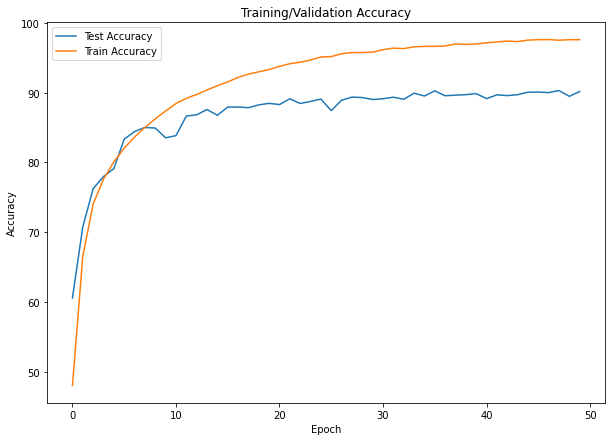

In [12]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.plot(train.train_acc)
axs.set_title("Training/Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
axs.legend(['Test Accuracy', 'Train Accuracy'], loc='best')
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S10/Accuracy_change_plot.jpg')

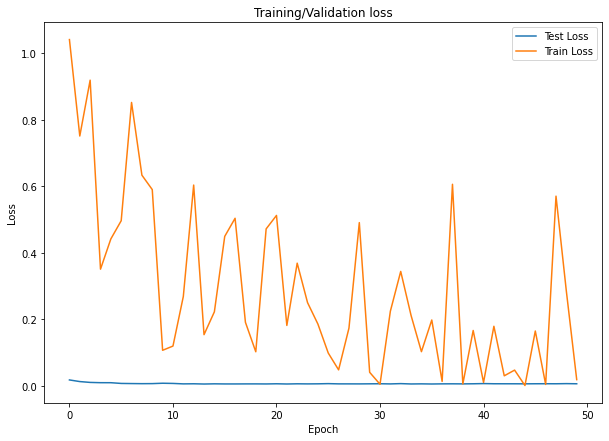

In [13]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.plot(train.train_losses)
axs.set_title("Training/Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
axs.legend(['Test Loss', 'Train Loss'], loc='best')
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S10/validation_loss_change_plot.jpg')

Okay, now let us see what the neural network thinks these examples above are:



The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [14]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:02<00:00, 54.69it/s]

Accuracy of plane : 96 %
Accuracy of   car : 98 %
Accuracy of  bird : 89 %
Accuracy of   cat : 78 %
Accuracy of  deer : 98 %
Accuracy of   dog : 80 %
Accuracy of  frog : 93 %
Accuracy of horse : 88 %
Accuracy of  ship : 92 %
Accuracy of truck : 87 %


#Misclassified Images

In [0]:
images1=[]
prediction1=[]
label1=[]
for x in random.sample(test.incorrect_pred, 25):
   images1.append(x['image'])
   prediction1.append(x['prediction'])
   label1.append(x['label'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


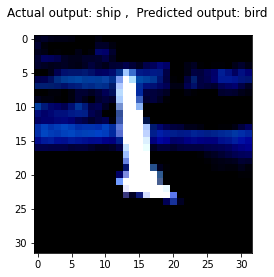

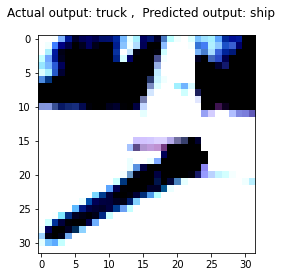

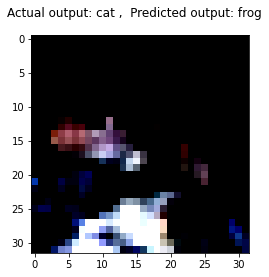

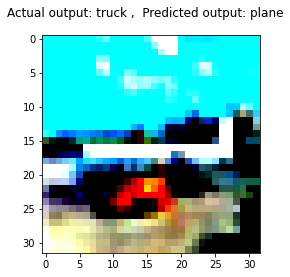

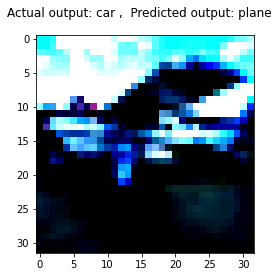

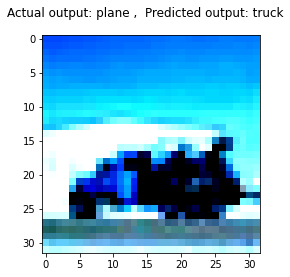

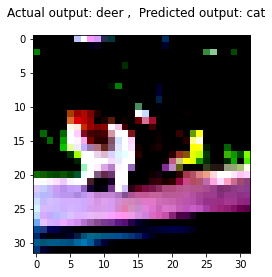

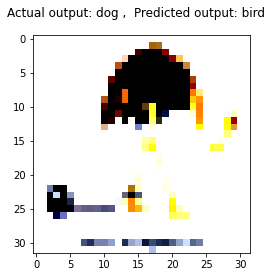

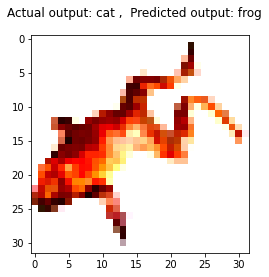

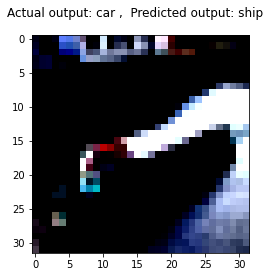

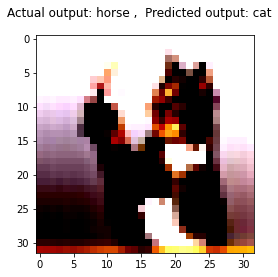

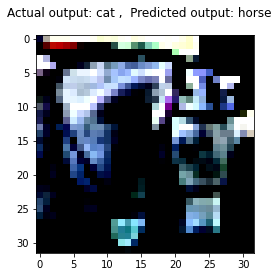

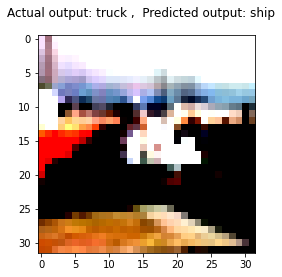

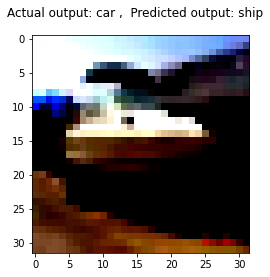

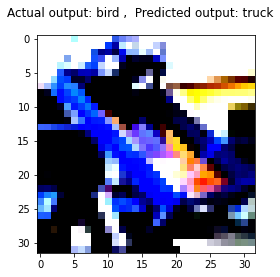

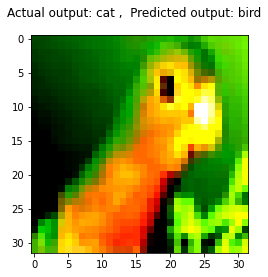

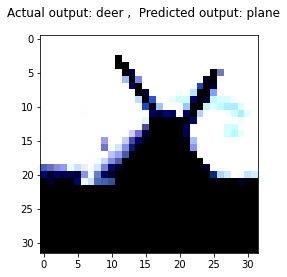

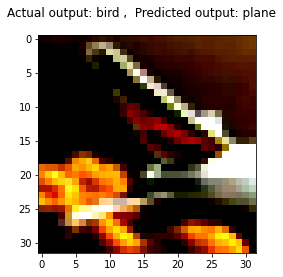

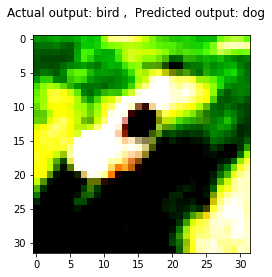

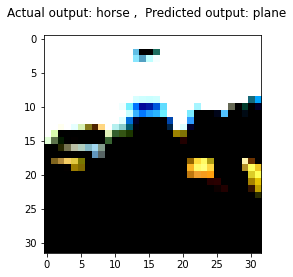

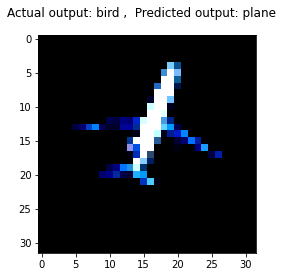

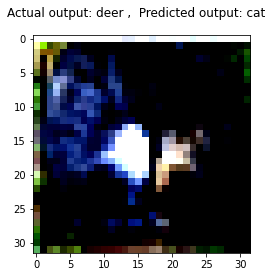

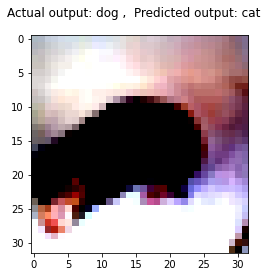

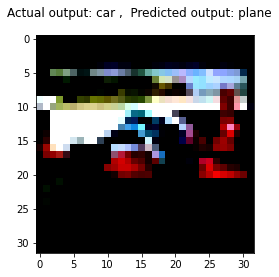

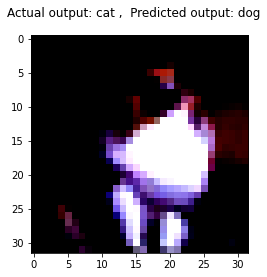

In [63]:
length = len(images1)
for i in range(length):
  image= np.transpose(images1[i].cpu().detach().numpy(), (1, 2, 0)).reshape(32,32,3)
  fig=plt.figure()
  plt.imshow(image)
  x=int(prediction1[i].cpu().detach().numpy())
  y=int(label1[i].cpu().detach().numpy())
  fig.suptitle("Actual output: " + str(classes[x]) + " , "+" Predicted output: " + str(classes[y]))
  fig.savefig("/content/gdrive/My Drive/Colab Notebooks/S10/Misclassified Images/image_" + str(i)+".jpg")

#GradCAM on Misclassified Images

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


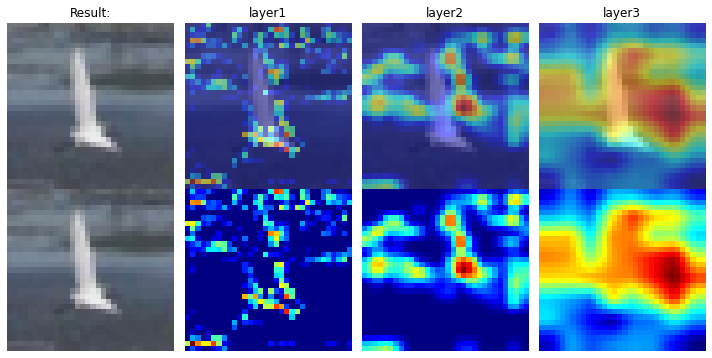

<Figure size 432x288 with 0 Axes>

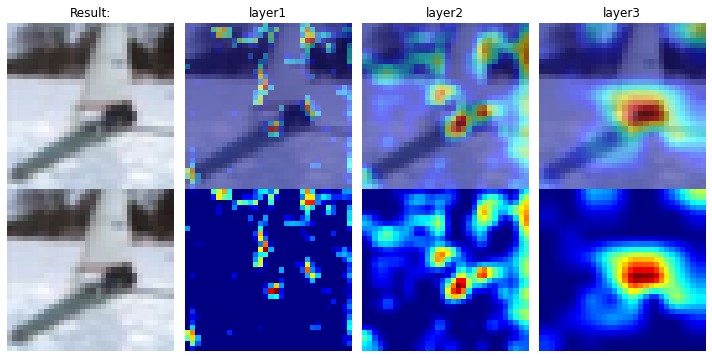

<Figure size 432x288 with 0 Axes>

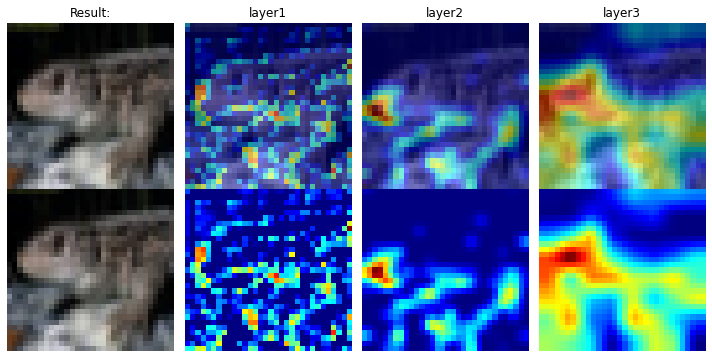

<Figure size 432x288 with 0 Axes>

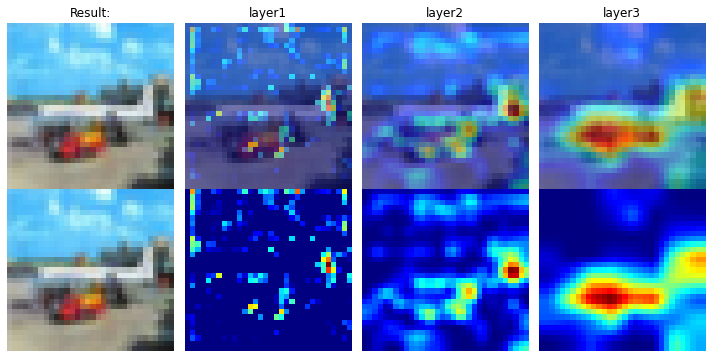

<Figure size 432x288 with 0 Axes>

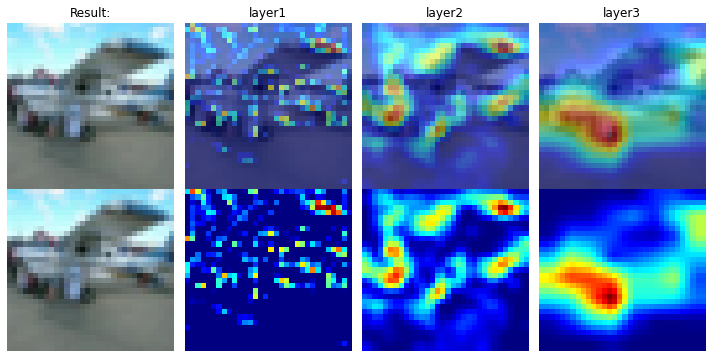

<Figure size 432x288 with 0 Axes>

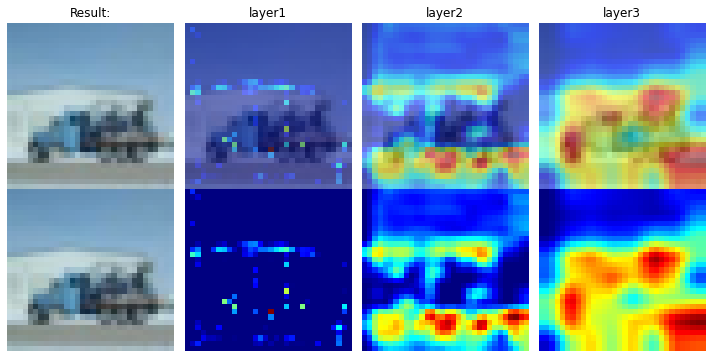

<Figure size 432x288 with 0 Axes>

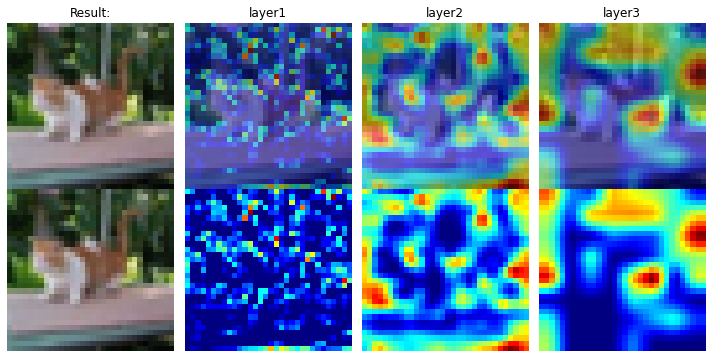

<Figure size 432x288 with 0 Axes>

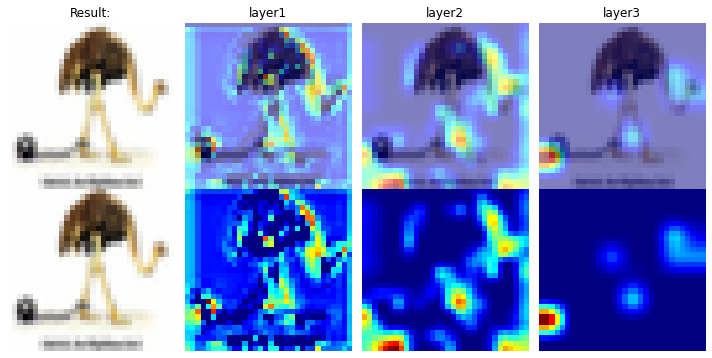

<Figure size 432x288 with 0 Axes>

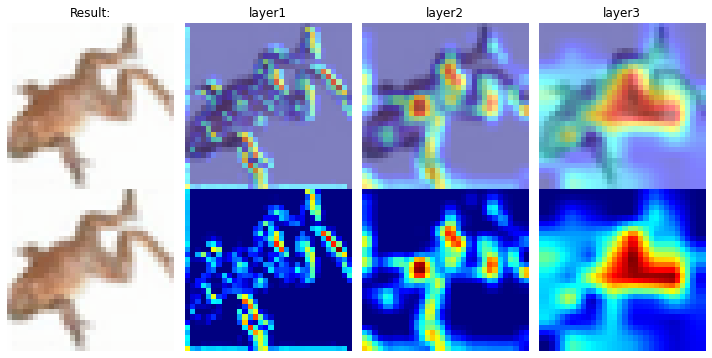

<Figure size 432x288 with 0 Axes>

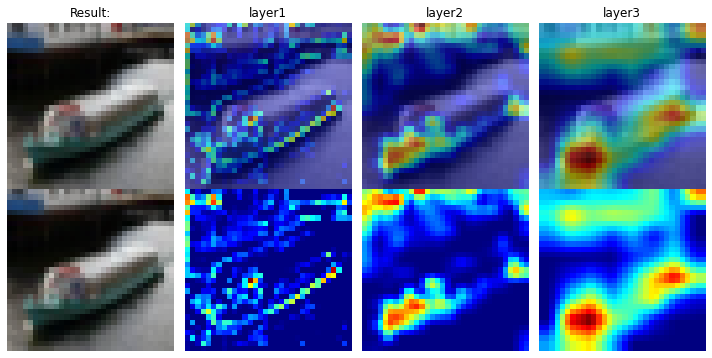

<Figure size 432x288 with 0 Axes>

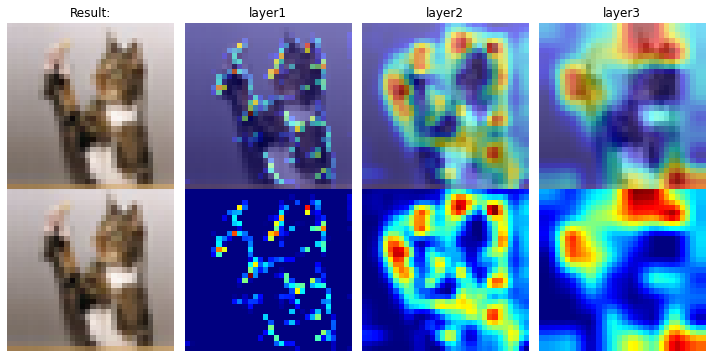

<Figure size 432x288 with 0 Axes>

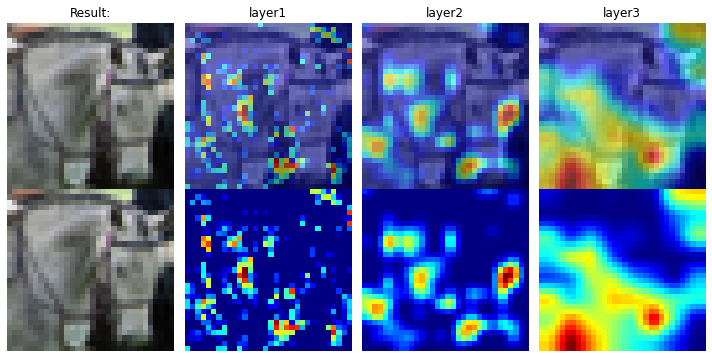

<Figure size 432x288 with 0 Axes>

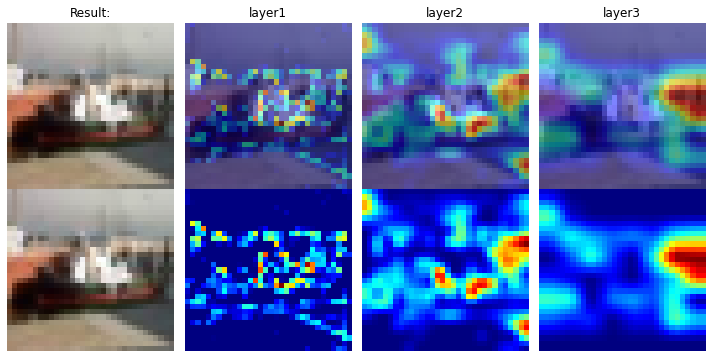

<Figure size 432x288 with 0 Axes>

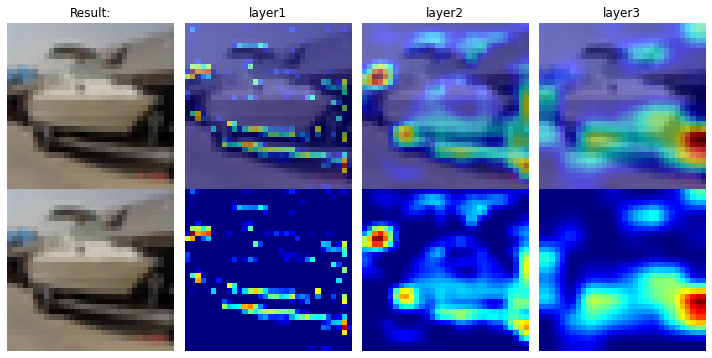

<Figure size 432x288 with 0 Axes>

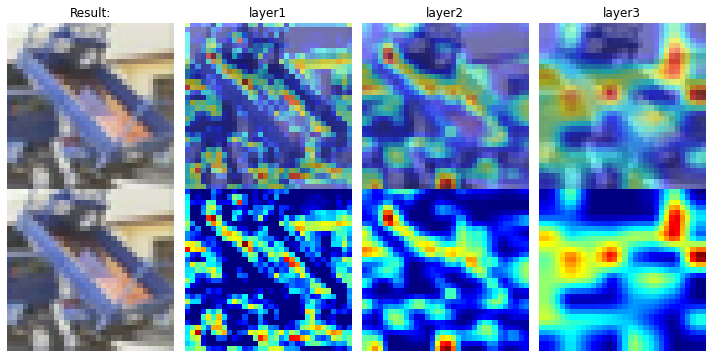

<Figure size 432x288 with 0 Axes>

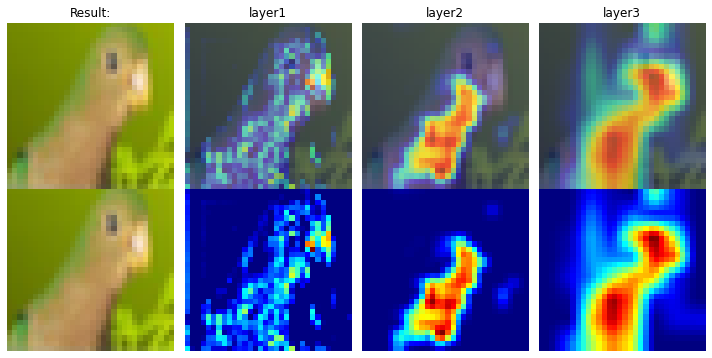

<Figure size 432x288 with 0 Axes>

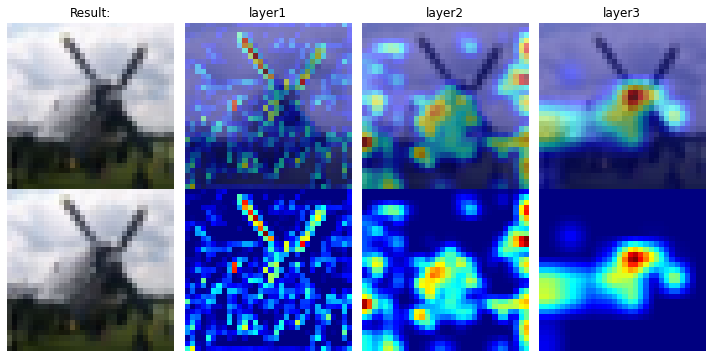

<Figure size 432x288 with 0 Axes>

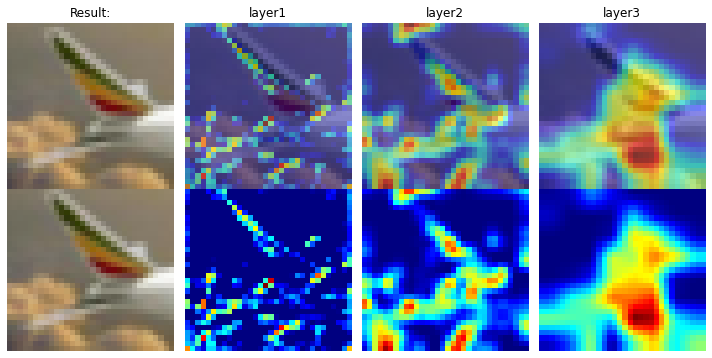

<Figure size 432x288 with 0 Axes>

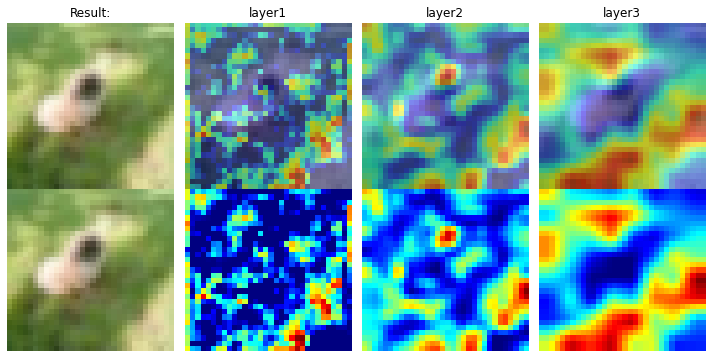

<Figure size 432x288 with 0 Axes>

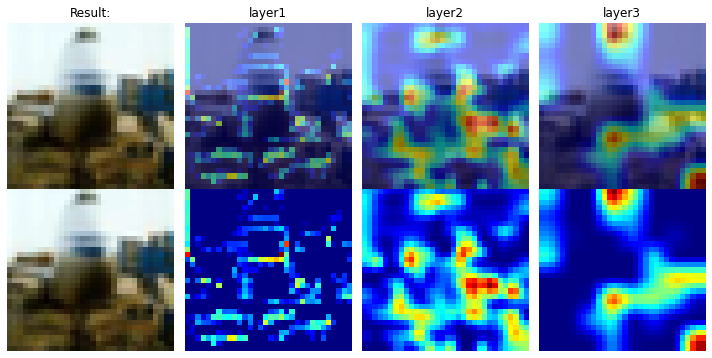

<Figure size 432x288 with 0 Axes>

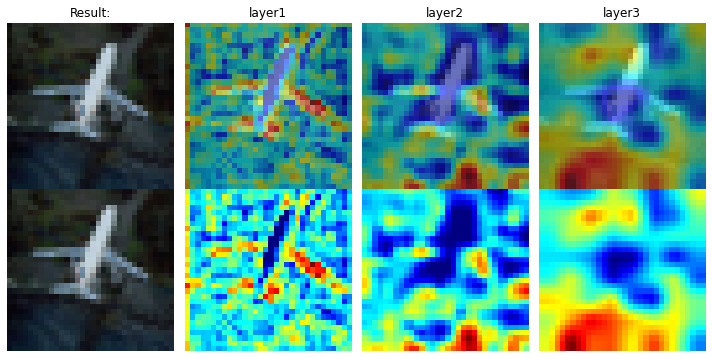

<Figure size 432x288 with 0 Axes>

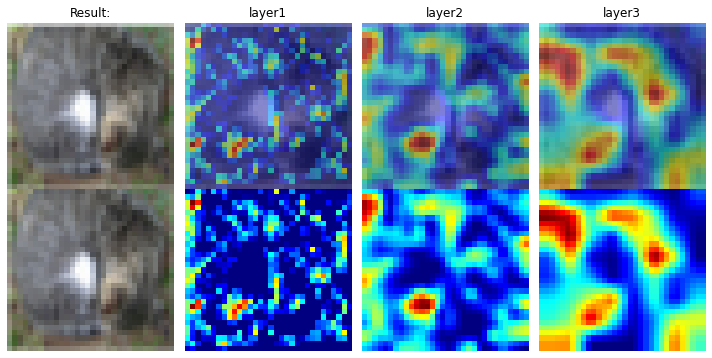

<Figure size 432x288 with 0 Axes>

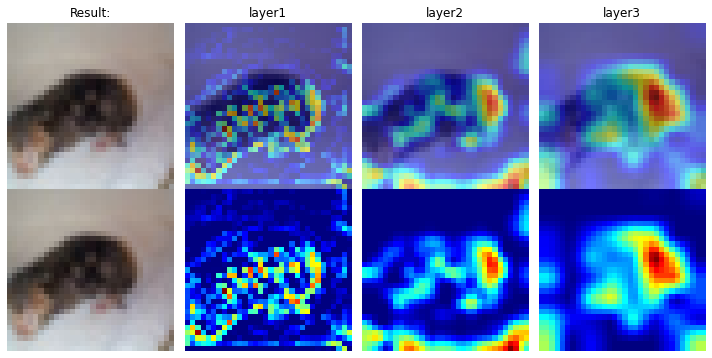

<Figure size 432x288 with 0 Axes>

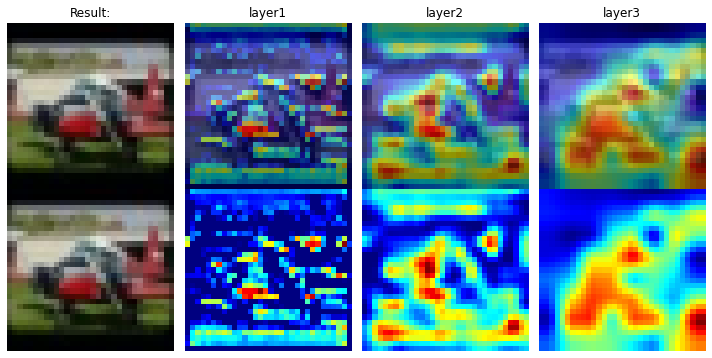

<Figure size 432x288 with 0 Axes>

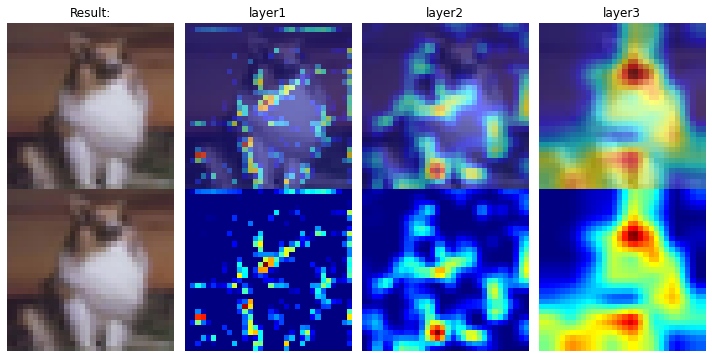

<Figure size 432x288 with 0 Axes>

In [65]:
import random

from gradCAMvisualize import GradCAMView

layers = ['layer1', 'layer2', 'layer3']

grad_cam = GradCAMView(
    net, layers, device, loader.mean, loader.std
)

#images = [x['image'] for x in random.sample(test.incorrect_pred, 25)]
#print(type(x['image']))
grad_cam(images1, '/content/gdrive/My Drive/Colab Notebooks/S10/GradCAM/')